In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from reg_helper import get_lin_reg_pol, get_ridge_weights, get_MLE_MAP_weights, plt_lin_reg_gauss, get_curves
import draw_nn
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


# Datos
Suponemos que tienen distribución Gaussiana por lo que el mejor estimador de todos (los lineales y los no lineales) es el lineal por ser los pesos y alturas conjuntamente Gaussianas

In [2]:
df = pd.read_csv('./data/alturas-pesos-mils-train.csv')

In [3]:
data = df[['Altura', 'Peso']].values

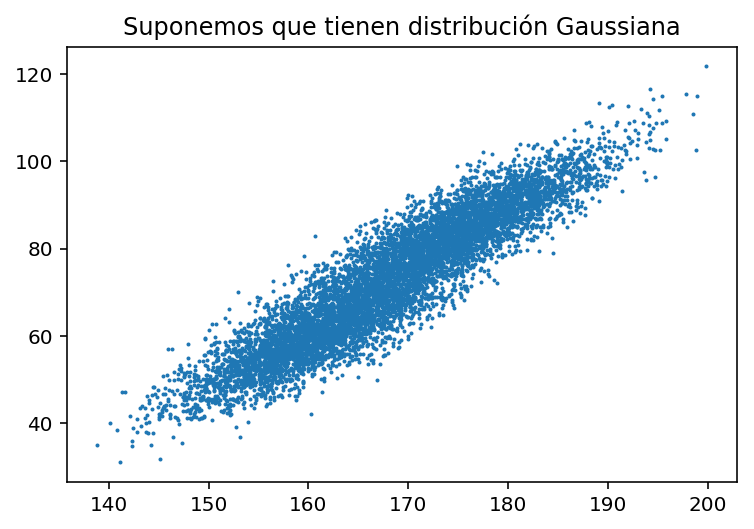

In [4]:
plt.scatter(data[:,0], data[:,1], s=1)
plt.title('Suponemos que tienen distribución Gaussiana')
plt.show()

# Regresión Lineal
Con todo el dataset de train (8000 observaciones)

$\large \hat{y} = w_o + w_1 x$

In [5]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(data[:,0].reshape(-1,1), data[:,1])
w_LR = np.array([clf.intercept_, clf.coef_[0]]).reshape(2,1)
print(w_LR)

[[-158.41934476]
 [   1.37539177]]


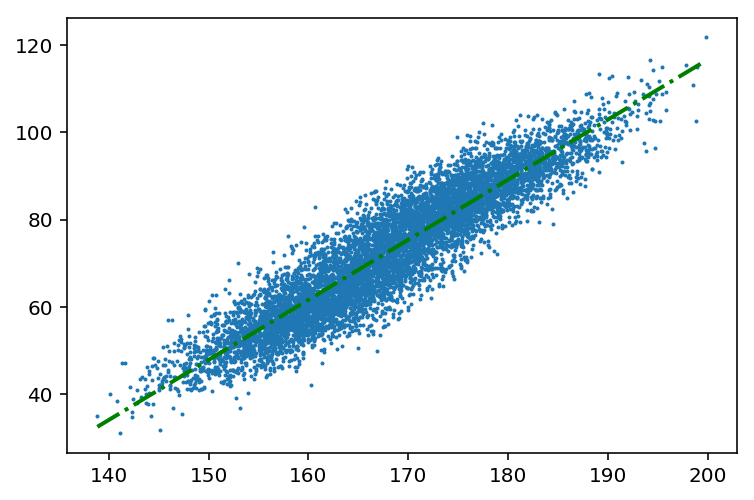

In [6]:
ptos = 100
alturas_lineal = np.linspace(data[:,0].min(),data[:,0].max(), ptos)
alturas_lineal_bias = get_lin_reg_pol(alturas_lineal, order=1, normalize=False)
pesos_LR = alturas_lineal_bias.dot(w_LR)
plt.scatter(data[:,0], data[:,1], s=1)
plt.plot(alturas_lineal, pesos_LR, 'g', ls='-.', lw=2)
plt.show()

# Con solo 20 observaciones
Calculo todas

In [7]:
order = 1
N=20
lamb = 1
alturas_pol, mean, std = get_lin_reg_pol(data[:,0], order, normalize=True)
WMLs, WRRs = get_MLE_MAP_weights(alturas_pol, data[:,1], order = order, lamb = lamb, N = N)

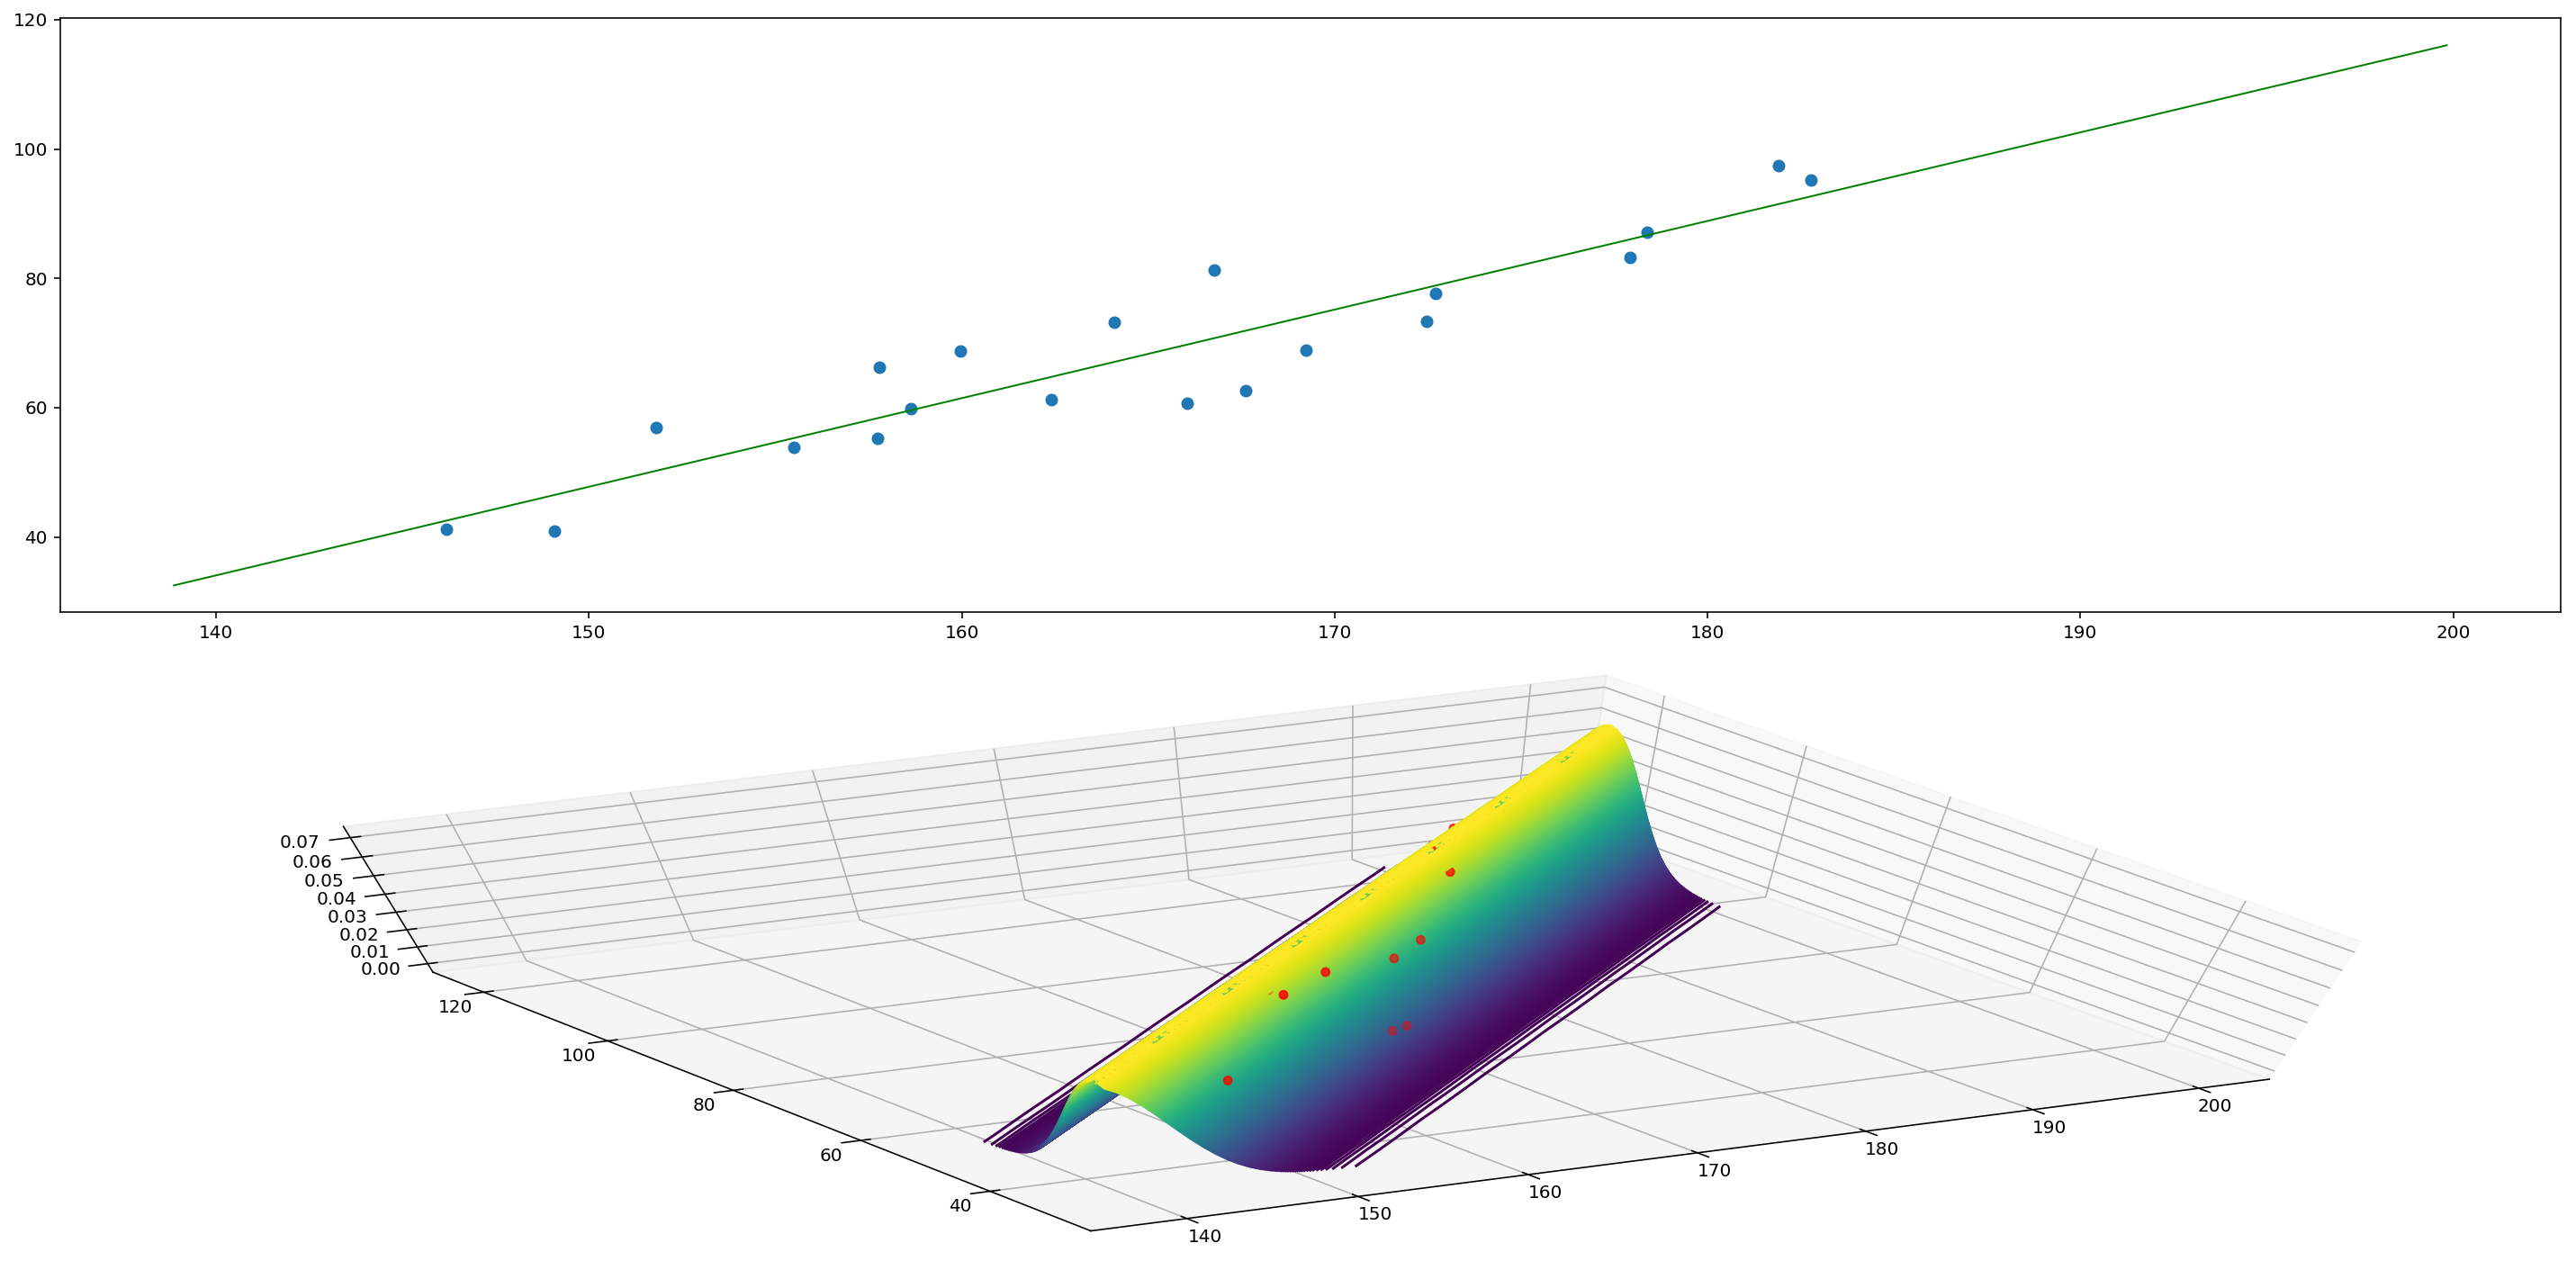

In [8]:
#%matplotlib qt
i = 0
al = np.linspace(data[:,0].min(),data[:,0].max(), 100)
alturas = data[i*N:(i+1)*N, 0]
pesos = data[i*N:(i+1)*N, 1]
fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 1, 2, projection='3d')
ax0.scatter(alturas, pesos)
sigma = (get_lin_reg_pol(alturas, order, normalize=False, mean=mean, std=std).dot(WMLs[i]) - pesos).std()
pe_MLE = get_lin_reg_pol(al, order, normalize=False, mean=mean, std=std).dot(WMLs[i])
ax0.plot(al, pe_MLE, 'g', lw=1)
plt.tight_layout()
plt_lin_reg_gauss(alturas, pesos, WMLs[i], sigma, data[:,0].min(),data[:,0].max(), data[:,1].min(),data[:,1].max(),order, mean, std, points = 100, ax=ax1)
plt.show()

# MLE (Maximum Likelihood Estimation)
$Y \sim N(Xw, \sigma^2I)$

$x_i$ e $y_i$ tienen dimensión $d$ mientras que N es el tamaño del dataset

$p(y_i|x_i;w) = N(x_i^Tw, \sigma^2)$

\begin{equation}
\large  p(y|x; w) = L(w; y_i, x_i) = \prod_{i}^N p(y_i|x_i;w) = \frac{1}{\sqrt{(2\pi)^N\sigma^2}} \prod_{i}^N  e^{-\frac{{(y_i-x_i^Tw)^2}}{2\sigma^2}}
\end{equation}

\begin{equation}
\large
log(L(w; y_i, x_i)) = -\frac{1}{2\sigma^2}\sum_i^N{(y_i-x_i^Tw)^2} + K
\end{equation}

\begin{equation}
\large
J(w) = \frac{1}{N}\sum_i^N{(y_i-x_i^Tw)^2}
\end{equation}

# Regresión Polinomial
De a N ejemplos

In [9]:
order = 3
N=20
lamb = 1
alturas_pol, mean, std = get_lin_reg_pol(data[:,0], order, normalize=True)
WMLs, WRRs = get_MLE_MAP_weights(alturas_pol, data[:,1], order = order, lamb = lamb, N = N)

$\large \hat{y} = w_o + w_1 x + w_2 x^2 + ... + w_2 x^N$

$\large \hat{y} = w_o + w_1 x + w_2 x_1 + ... + w_2 x_N$

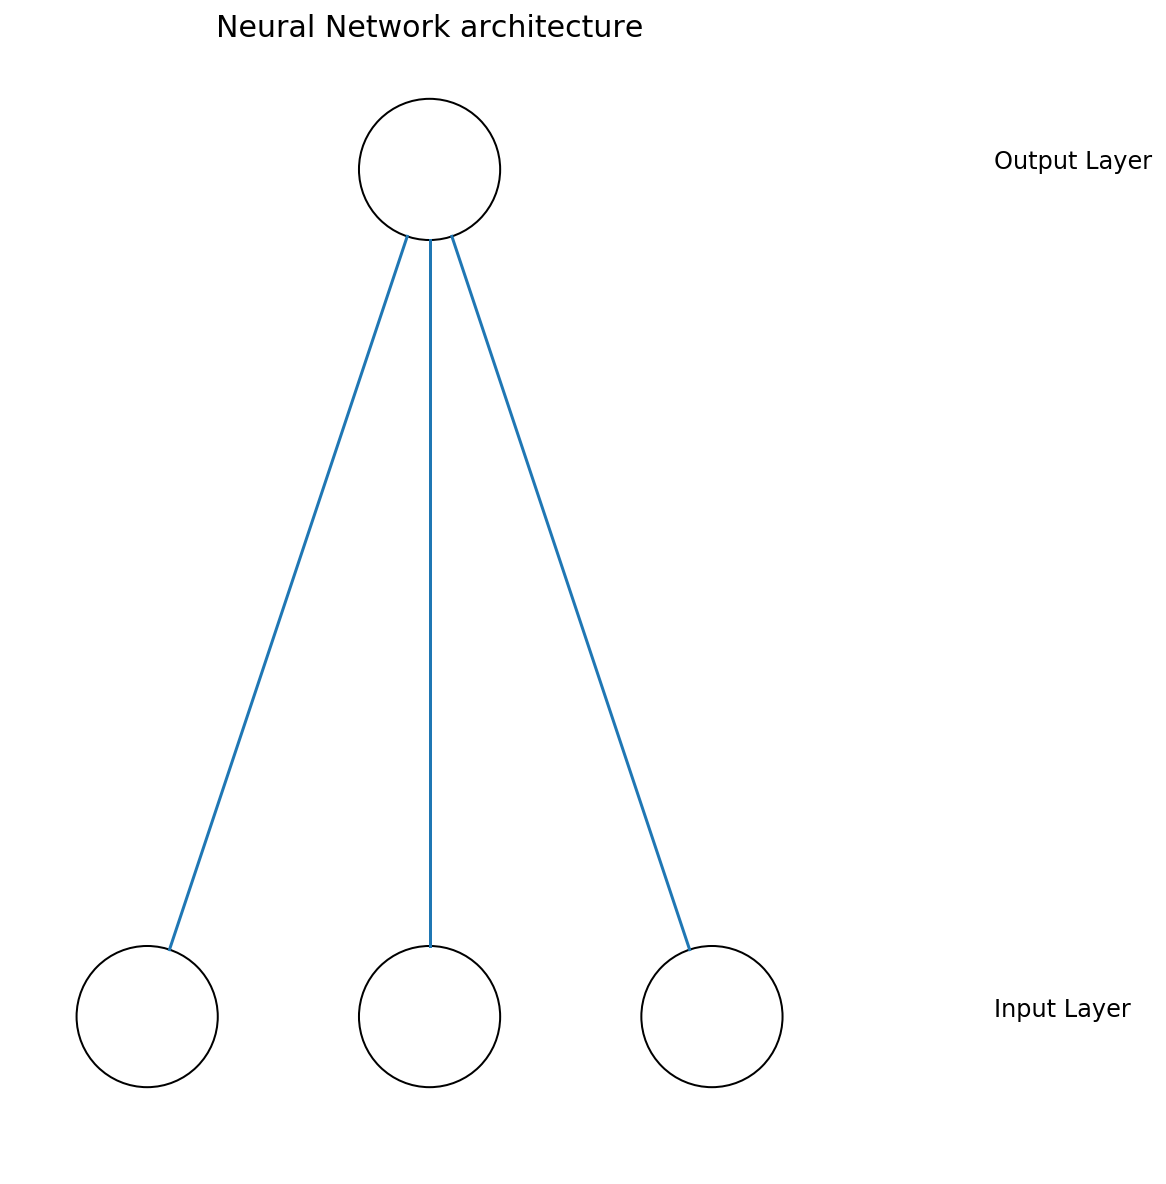

In [10]:
network = draw_nn.DrawNN( [order, 1] )
network.draw()

In [11]:
# No son en este ejemplo exactamente al cuadrado por que cada X_i esta normalizada
alturas_pol[:10]

array([[ 1.        , -0.58111413, -0.59919284, -0.61492352],
       [ 1.        ,  1.40354187,  1.42883852,  1.45108504],
       [ 1.        ,  0.44214463,  0.41773429,  0.39184215],
       [ 1.        , -1.05463966, -1.04911428, -1.0406829 ],
       [ 1.        , -1.6600279 , -1.60527328, -1.54956959],
       [ 1.        , -0.96561197, -0.96552289, -0.96251963],
       [ 1.        ,  0.46717413,  0.44337425,  0.41799906],
       [ 1.        ,  0.11309831,  0.08406098,  0.0548634 ],
       [ 1.        , -1.28468719, -1.26297334, -1.23867548],
       [ 1.        ,  0.99655817,  0.99423097,  0.98887532]])

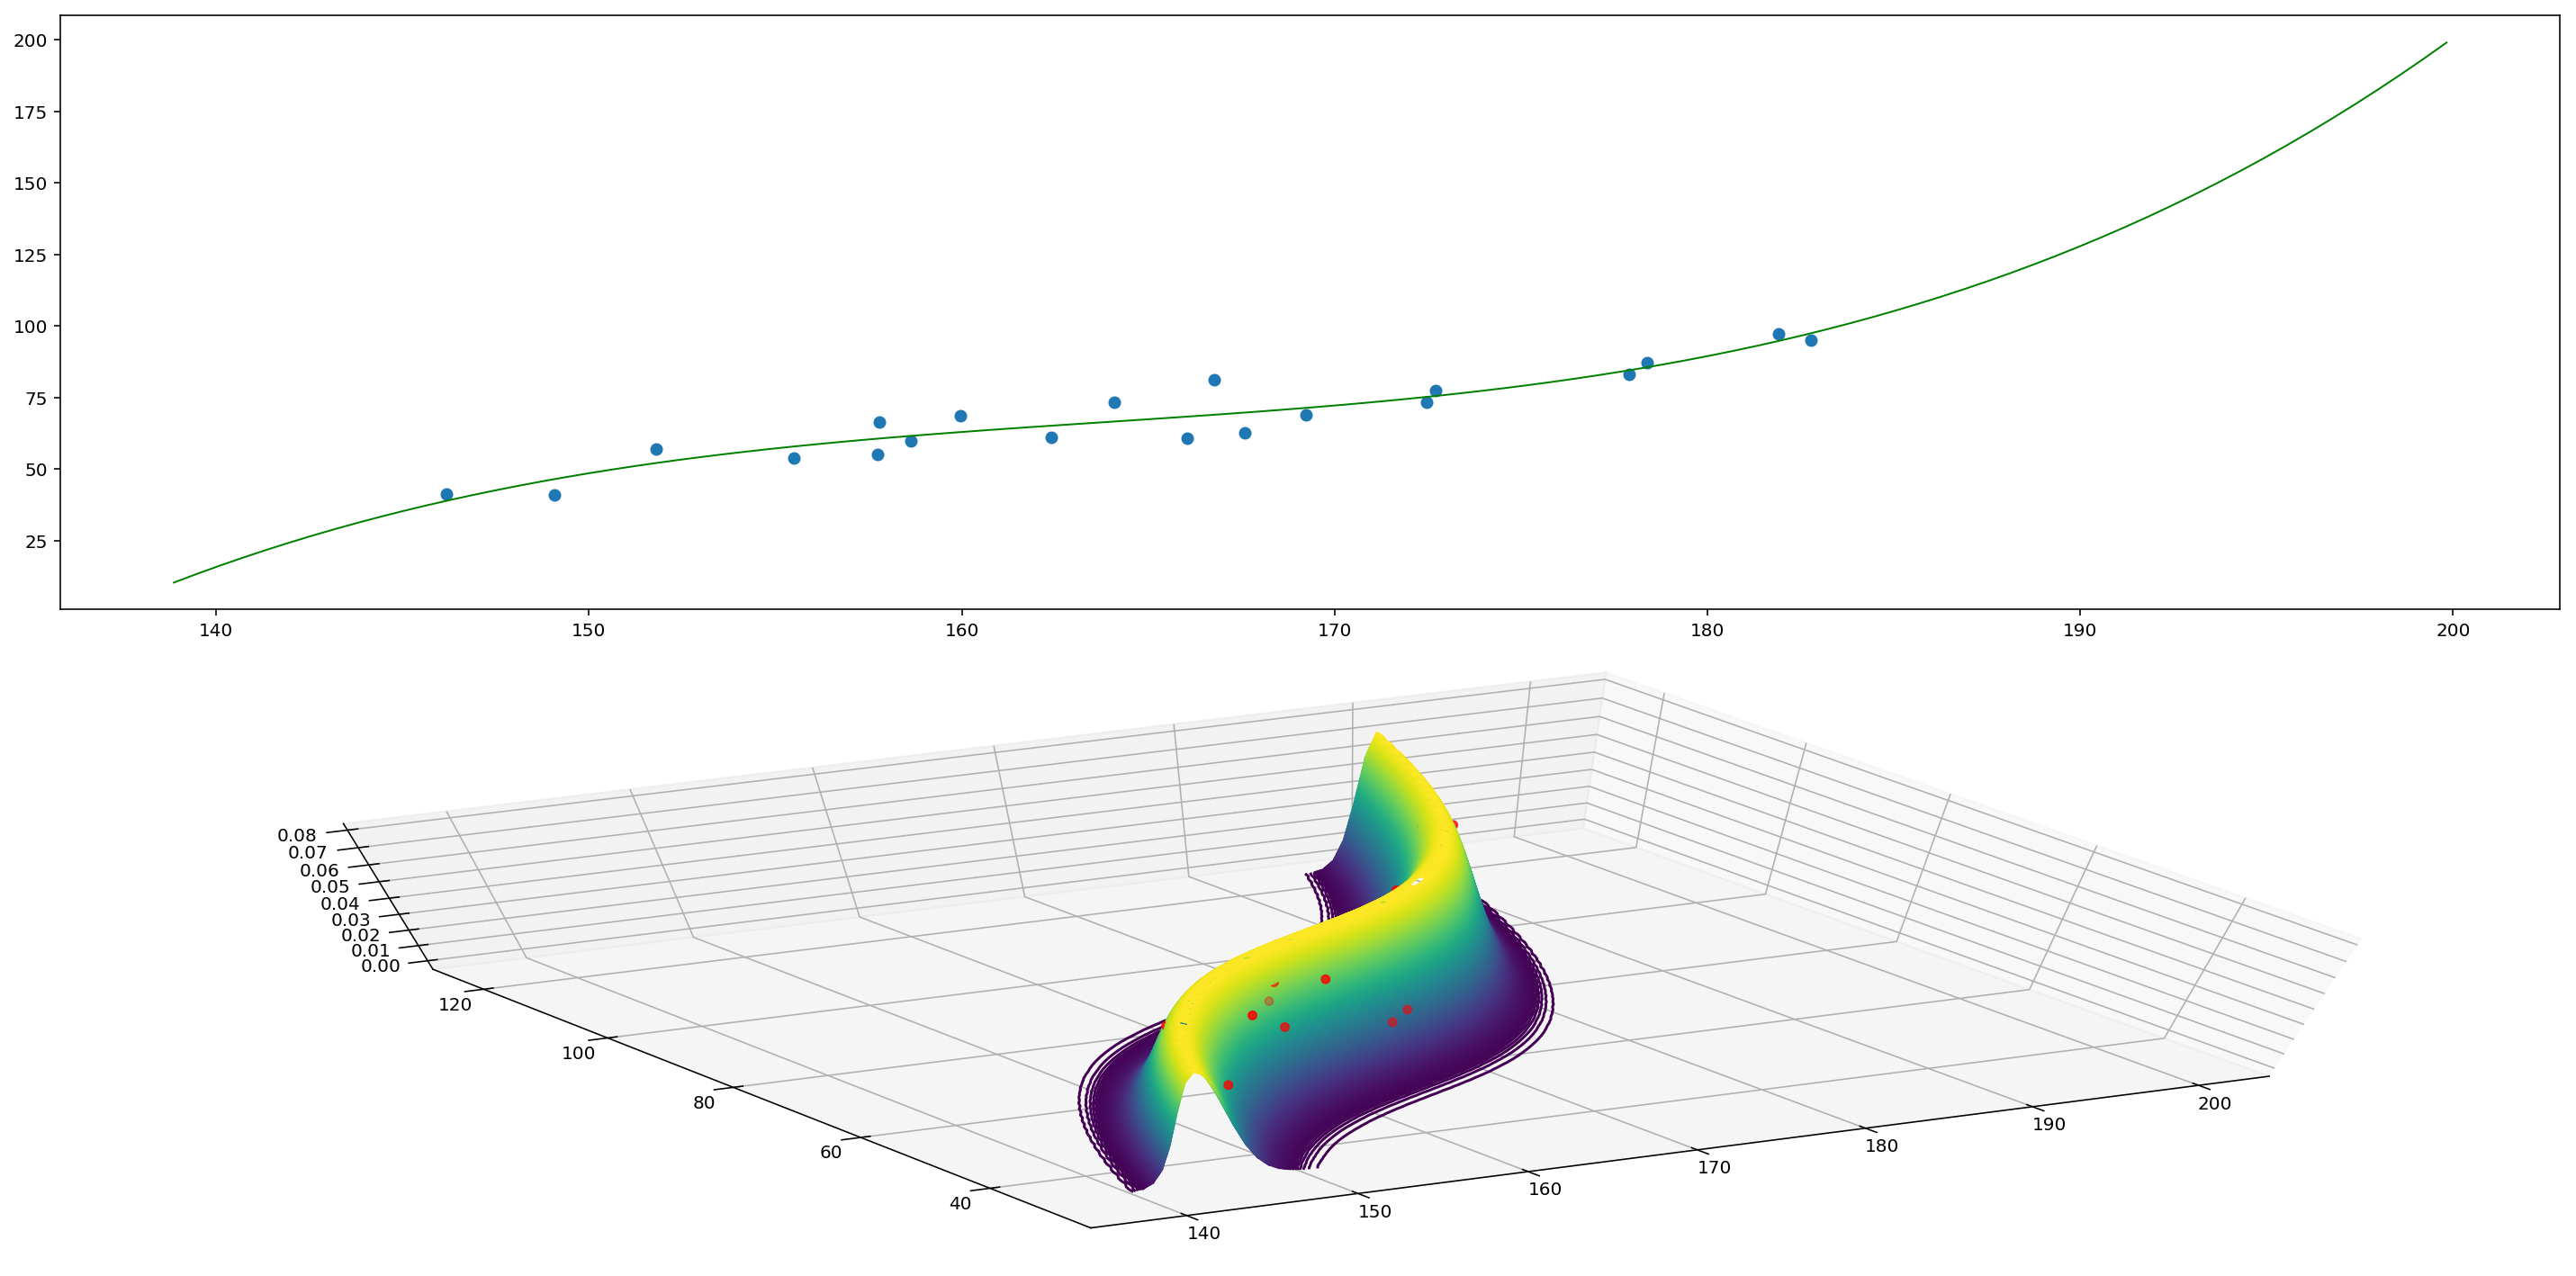

In [12]:
#%matplotlib qt
i = 0
al = np.linspace(data[:,0].min(),data[:,0].max(), 100)
alturas = data[i*N:(i+1)*N, 0]
pesos = data[i*N:(i+1)*N, 1]
fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 1, 2, projection='3d')
ax0.scatter(alturas, pesos)
sigma = (get_lin_reg_pol(alturas, order, normalize=False, mean=mean, std=std).dot(WMLs[i]) - pesos).std()
pe_MLE = get_lin_reg_pol(al, order, normalize=False, mean=mean, std=std).dot(WMLs[i])
ax0.plot(al, pe_MLE, 'g', lw=1)
plt.tight_layout()
plt_lin_reg_gauss(alturas, pesos, WMLs[i], sigma, data[:,0].min(),data[:,0].max(), data[:,1].min(),data[:,1].max(),order, mean, std, points = 100, ax=ax1)
plt.show()

# Regresión polinomial vs Ridge polinomial (L2)

### Regresión Ridge (MAP)

$Y \sim N(Xw, \sigma^2I)$

$w \sim N(0, \frac{\lambda^{-1} I_d}{2})$

$x_i$ e $y_i$ tienen dimensión $d$ mientras que N es el tamaño del dataset

\begin{equation}
\large  p(w|x,y) = \frac{p(y|x, w)p(w)}{p(y|x)}  = \frac{N(Xw, \sigma^2I) N(0, \frac{\lambda^{-1} I_d}{2})}{K_1}
\end{equation}

\begin{equation}
\large
p(w) = \frac{1}{\sqrt{(2\pi)^d|\Sigma_w|}}e^{-\frac{{w^T\Sigma_w^{-1} w}}{2}} = K_0e^{-{\lambda w^Tw}}
\end{equation}

\begin{equation}
\large
p(y_i|x_i;w) = \frac{1}{\sqrt{(2\pi)^N\sigma^2}} \prod_{i}^N  e^{-\frac{{(y_i-x_i^Tw)^2}}{2\sigma^2}}
\end{equation}

\begin{equation}
\large
 log(p(w|x,y))  = -\frac{1}{2\sigma^2}\sum_i^N{(y_i-x_i^Tw)^2} - \lambda \sum_{i}^d{w_i}^2 + K
\end{equation}

\begin{equation}
\large
J(w) = \frac{1}{N}\sum_i^N{(y_i-x_i^Tw)^2} + \lambda \sum_{i}^d{w_i}^2
\end{equation}

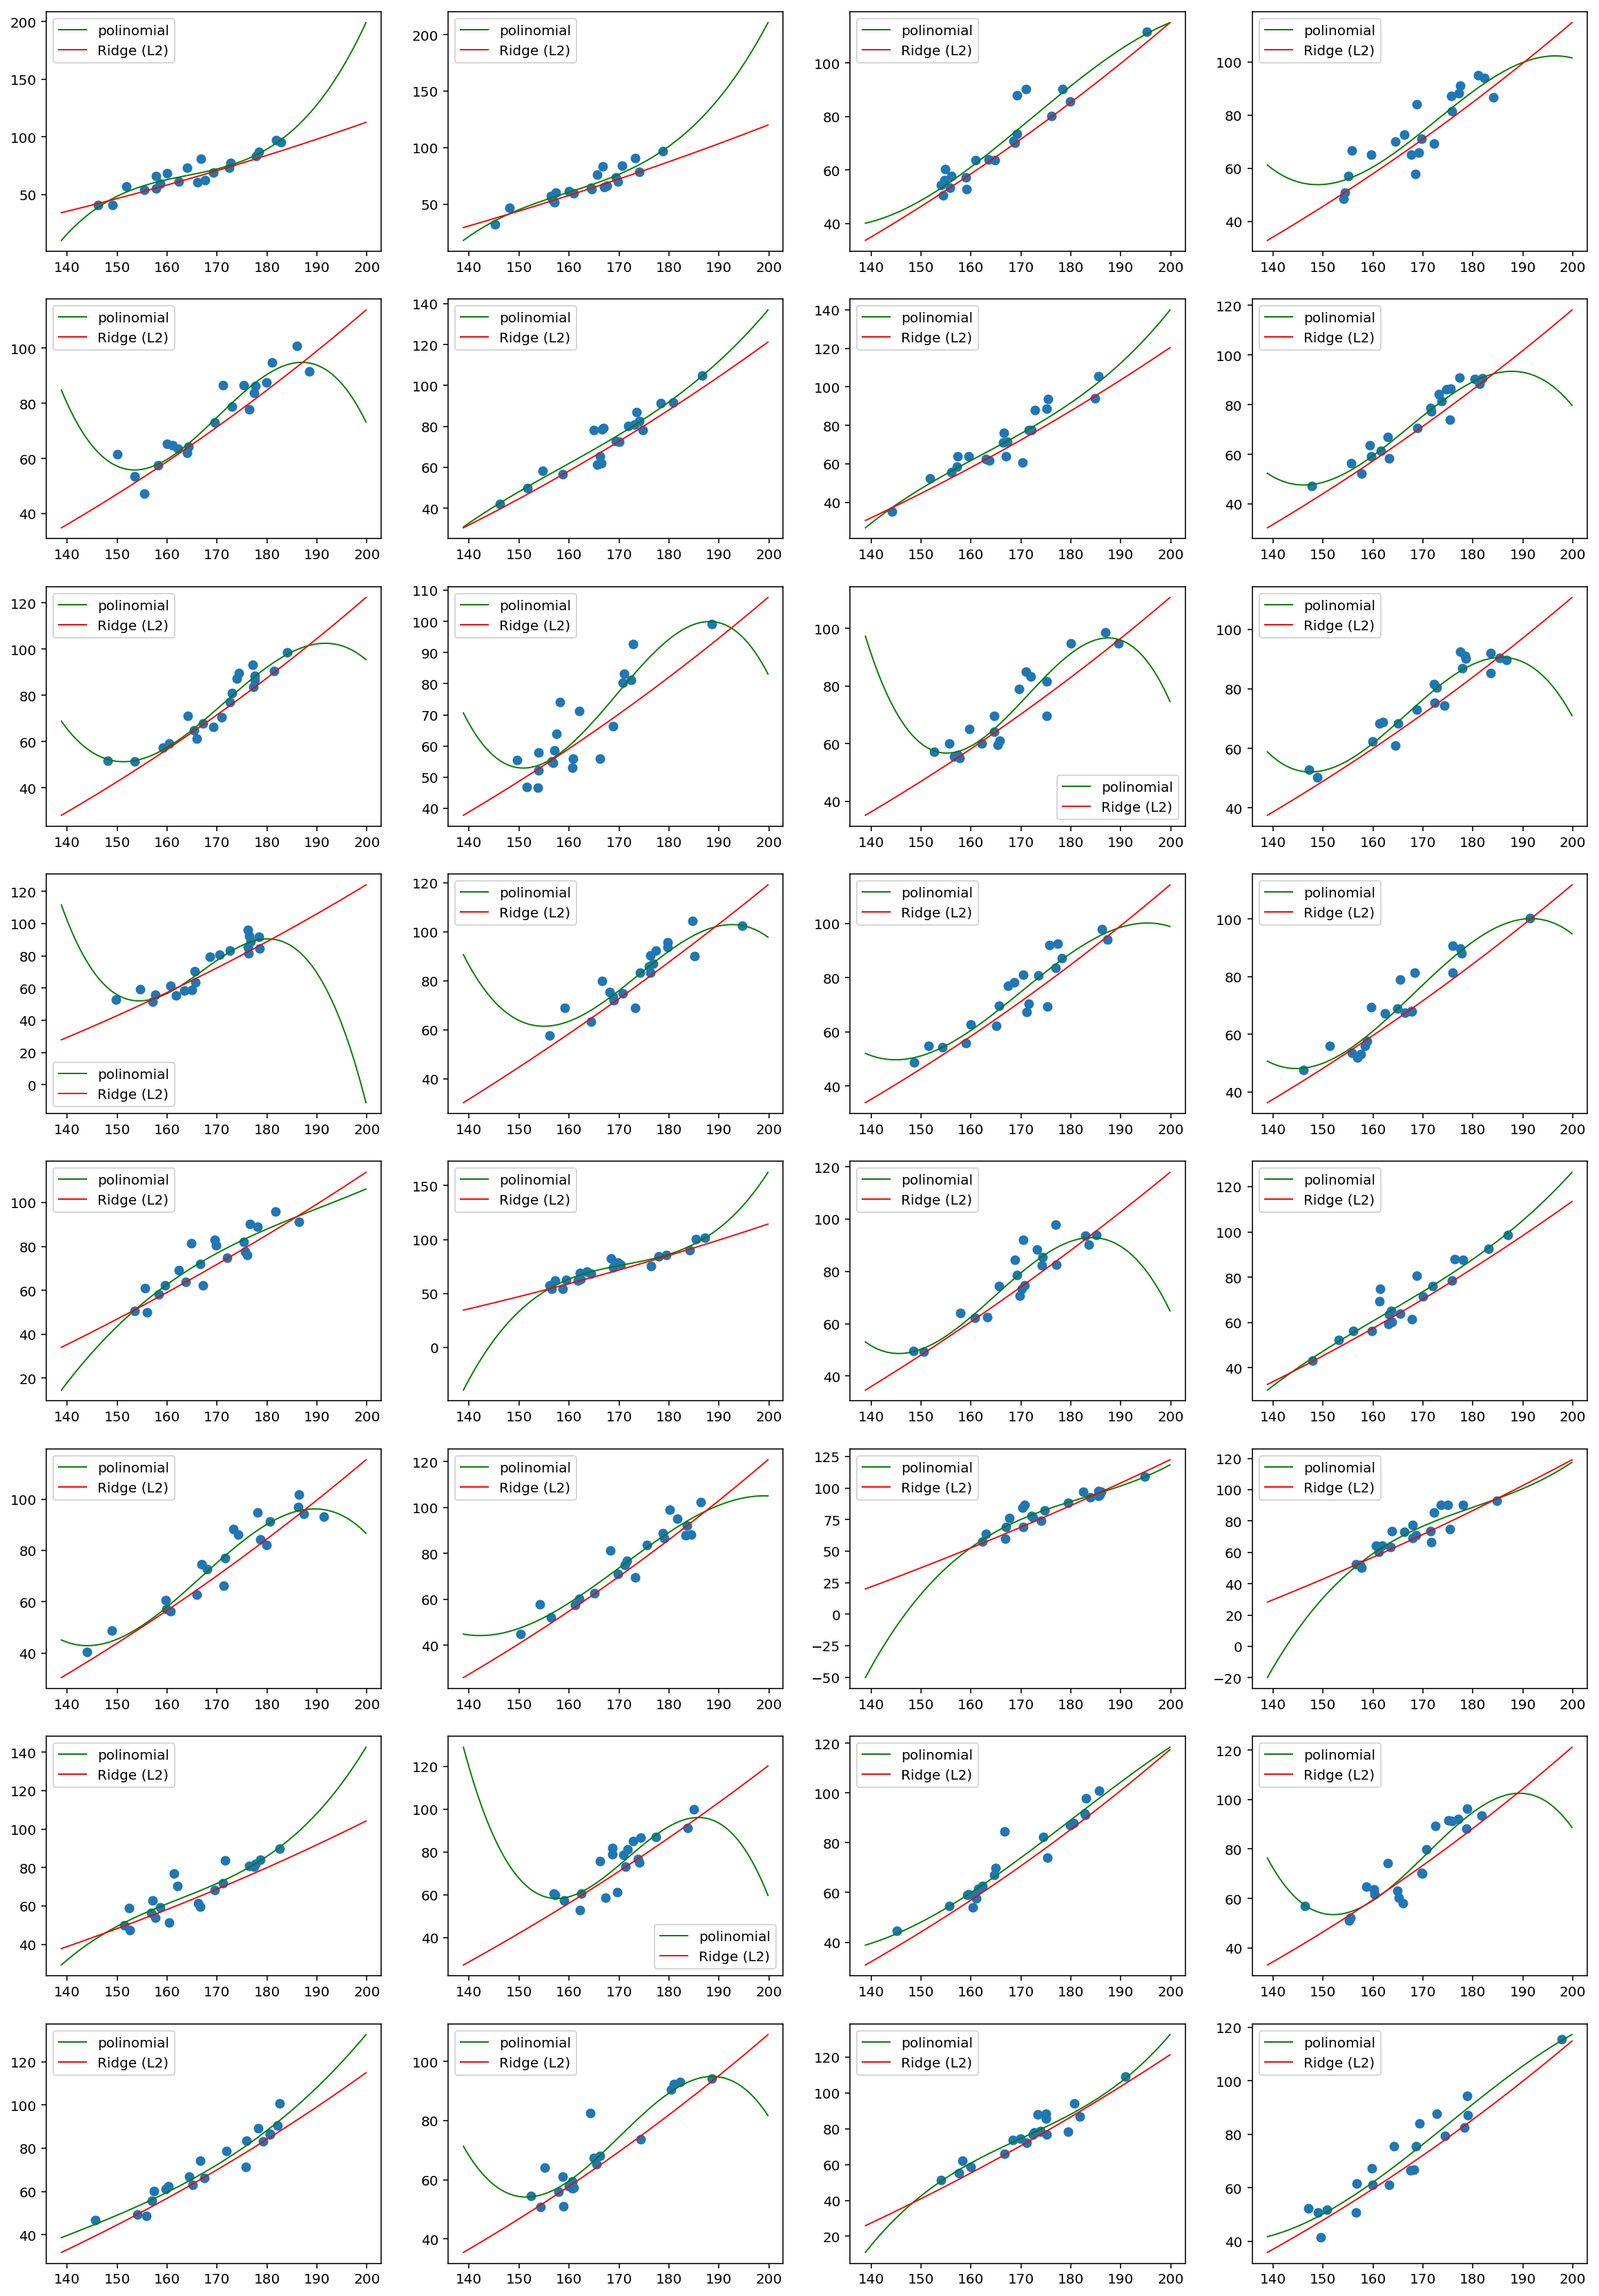

In [13]:
ptos = 100
f, ax = plt.subplots(8,4, figsize=(20,30))
ax = ax.reshape(-1)
al = np.linspace(data[:,0].min(),data[:,0].max(), ptos)
al_pol = get_lin_reg_pol(al, order, normalize=False, mean=mean, std=std)
for i, w in enumerate(WMLs[:len(ax)]):
    ax[i].scatter(data[i*N:(i+1)*N, 0], data[i*N:(i+1)*N, 1])
    pe_MLE = al_pol.dot(w)
    pe_MAP = al_pol.dot(WRRs[i])
    ax[i].plot(al, pe_MLE, 'g', lw=1, label='polinomial')
    ax[i].plot(al, pe_MAP, 'r', lw=1, label='Ridge (L2)')
    ax[i].legend()
plt.show()

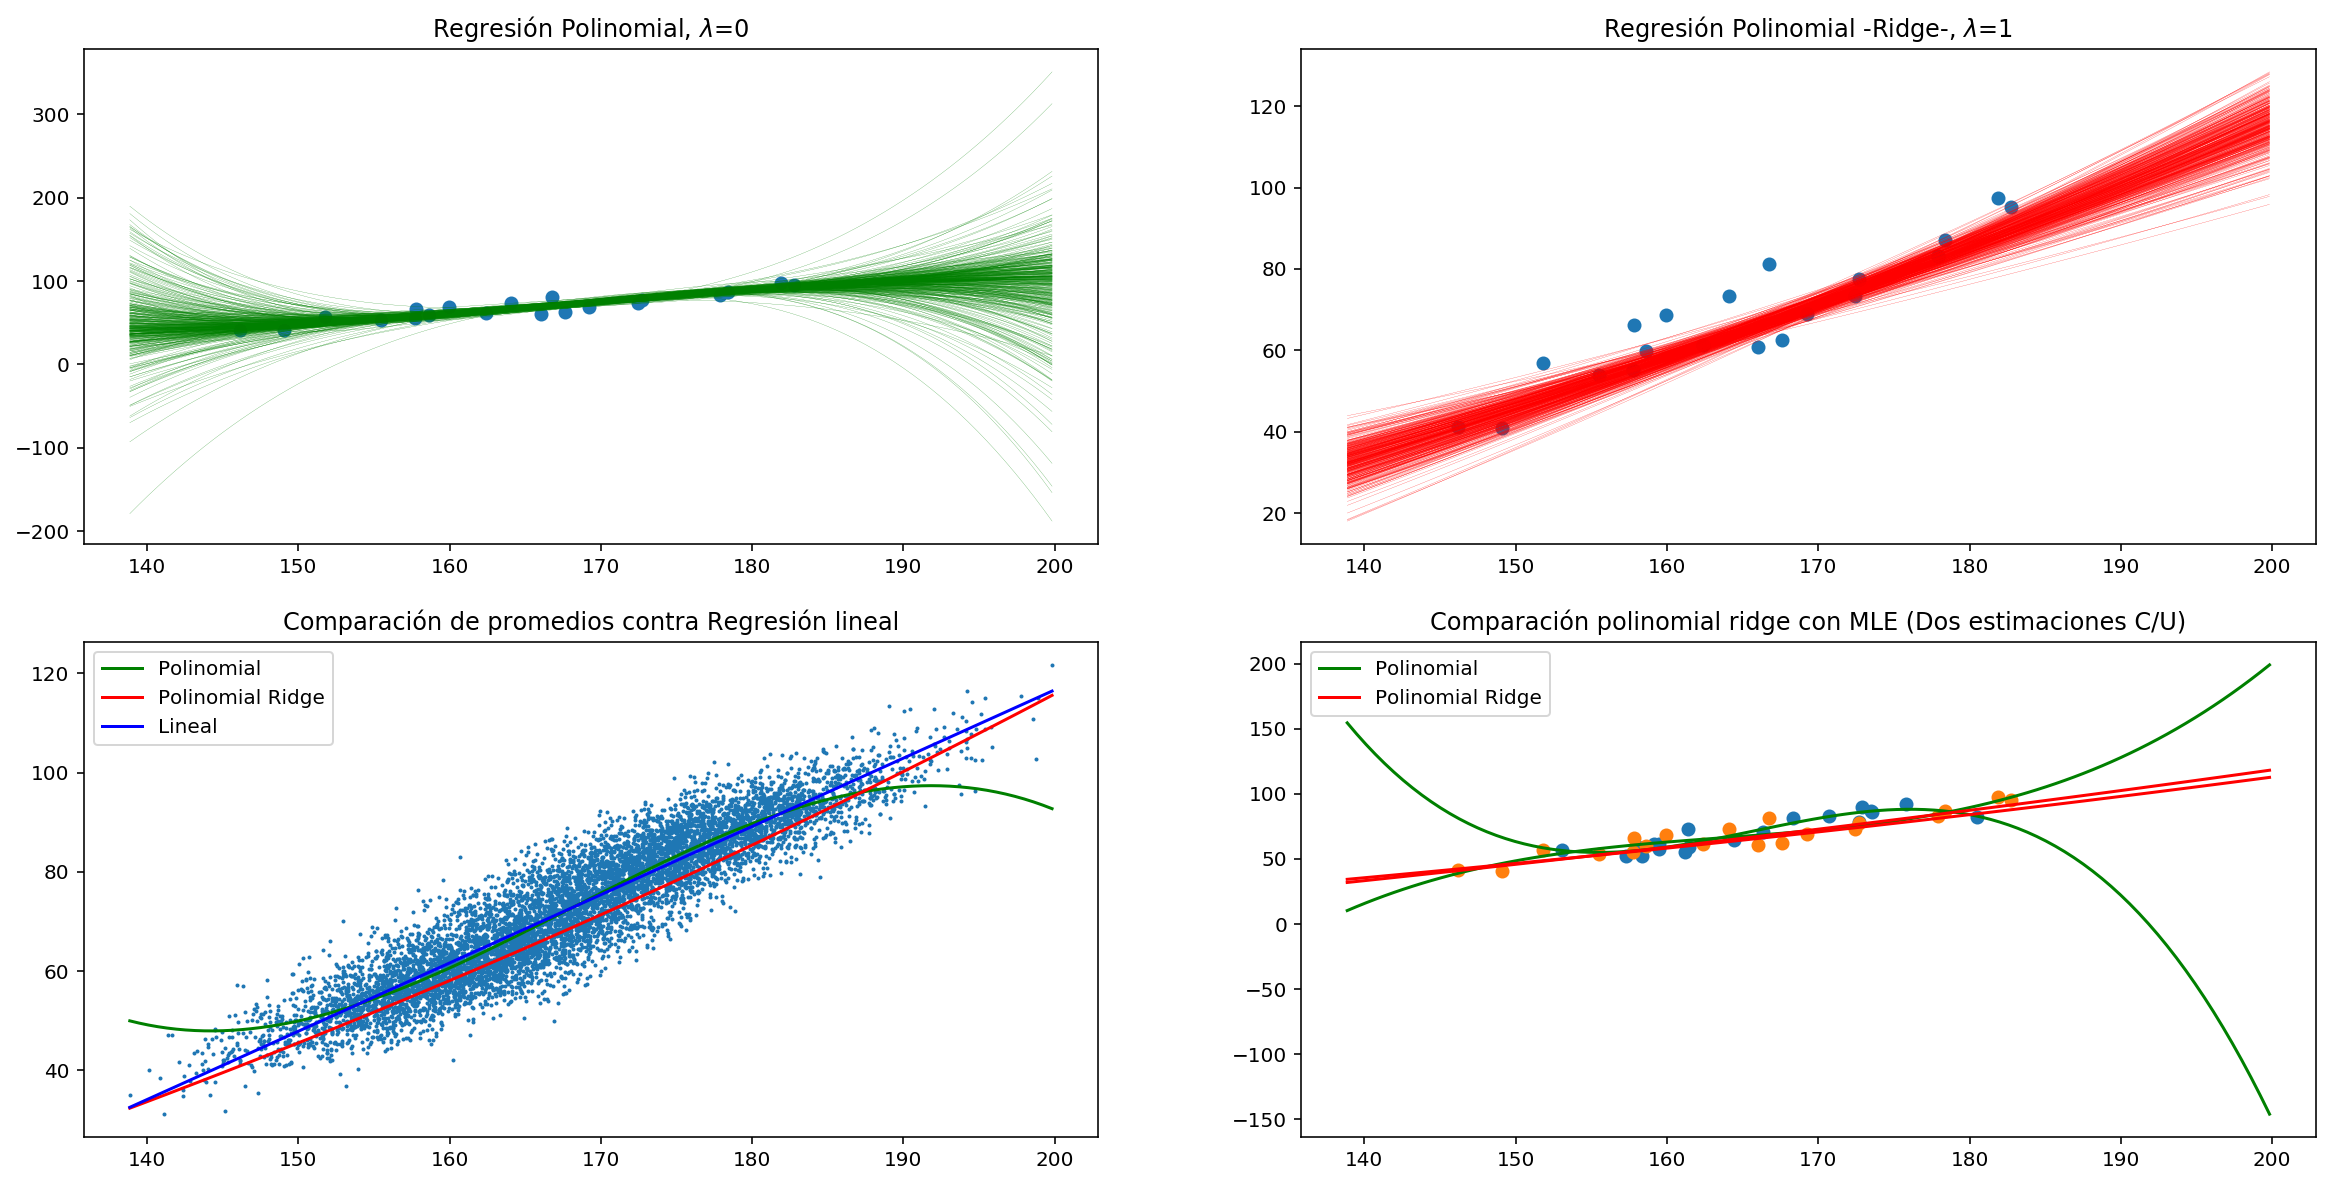

In [14]:
ptos = 100
f, ax = plt.subplots(2,2, figsize=(20,10))
al = np.linspace(data[:,0].min(),data[:,0].max(), ptos)
al_pol = get_lin_reg_pol(al, order, normalize=False, mean=mean, std=std)
alturas_lineal_bias = get_lin_reg_pol(alturas_lineal, order=1, normalize=False)
ax[0,0].scatter(data[:N,0], data[:N,1])
ax[1,0].scatter(data[:,0], data[:,1], s=1)
ax[0,1].scatter(data[:N,0], data[:N,1])
K1 = 40
K2=0
ax[1,1].scatter(data[K1*N:(K1+1)*N, 0], data[K1*N:(K1+1)*N, 1])
ax[1,1].scatter(data[K2*N:(K2+1)*N, 0], data[K2*N:(K2+1)*N, 1])
ax[0,0].set_title("Regresión Polinomial, $\lambda$=0")
ax[0,1].set_title("Regresión Polinomial -Ridge-, $\lambda$=" + str(lamb))
pe_MLE = al_pol.dot(WMLs.mean(axis=0))
pe_MAP = al_pol.dot(WRRs.mean(axis=0))
pe_LR = alturas_lineal_bias.dot(w_LR)
ax[1,0].plot(al, pe_MLE, 'g', label='Polinomial')
ax[1,0].plot(al, pe_MAP, 'r', label='Polinomial Ridge')
ax[1,0].plot(al, pe_LR, 'b', label='Lineal')
ax[1,0].legend()
ax[1,0].set_title("Comparación de promedios contra Regresión lineal")

ax[1,1].plot(al, al_pol.dot(WMLs[K1]), 'g', label='Polinomial')
ax[1,1].plot(al, al_pol.dot(WMLs[K2]), 'g')
ax[1,1].plot(al, al_pol.dot(WRRs[K1]), 'r', label='Polinomial Ridge')
ax[1,1].plot(al, al_pol.dot(WRRs[K2]), 'r')
ax[1,1].set_title("Comparación polinomial ridge con MLE (Dos estimaciones C/U)")
ax[1,1].legend()

curv_MLE = np.zeros([len(WMLs), ptos])
curv_MAP = np.zeros([len(WRRs), ptos])
for i, w in enumerate(WMLs):
    curv_MLE[i] = al_pol.dot(w)

for i, w in enumerate(WRRs):
    curv_MAP[i] = al_pol.dot(w)
    
ax[0,0].plot(al, curv_MLE.T, 'g', lw=0.1)
ax[0,1].plot(al, curv_MAP.T, 'r', lw=0.1)


plt.show()

# Media de polinomial y ridge comparada con lineal

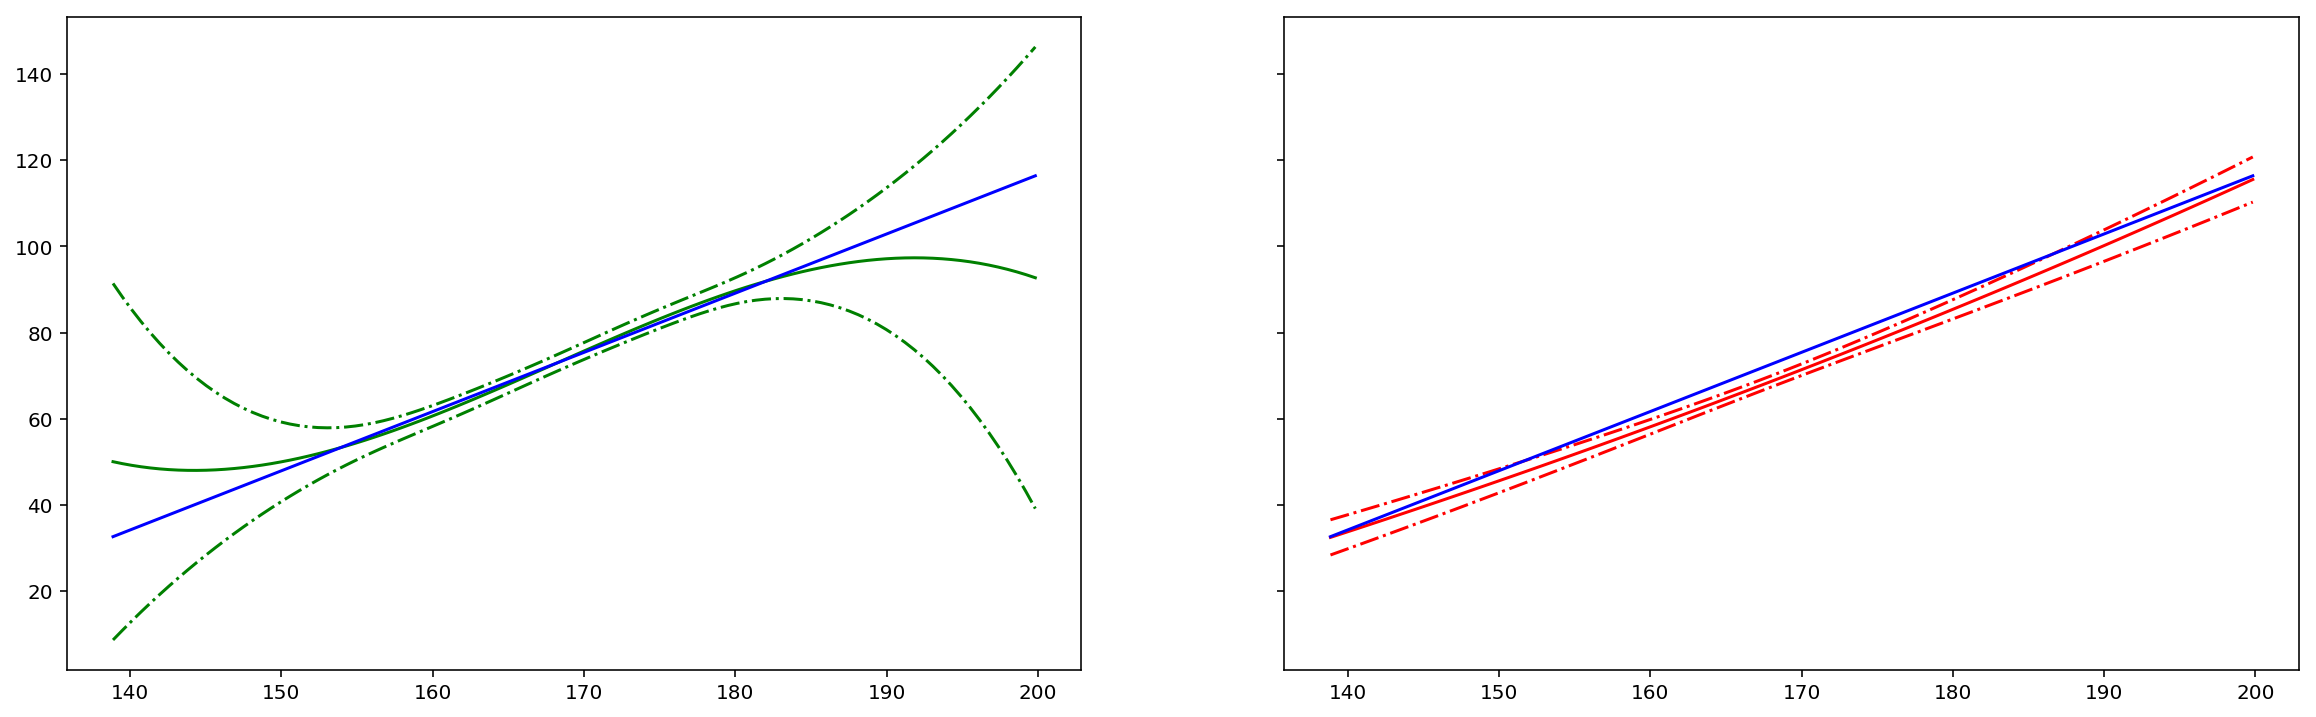

In [15]:
al = np.linspace(data[:,0].min(),data[:,0].max(), ptos)
f, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(20,6))
ax[0].plot(al, curv_MLE.mean(axis=0), 'g')
ax[0].plot(al, curv_MLE.mean(axis=0) + curv_MLE.std(axis=0), 'g', ls='-.')
ax[0].plot(al, curv_MLE.mean(axis=0) - curv_MLE.std(axis=0), 'g', ls='-.')
ax[0].plot(al, pe_LR, 'b', label='Lineal')
ax[1].plot(al, curv_MAP.mean(axis=0), 'r')
ax[1].plot(al, curv_MAP.mean(axis=0) + curv_MAP.std(axis=0), 'r', ls='-.')
ax[1].plot(al, curv_MAP.mean(axis=0) - curv_MAP.std(axis=0), 'r', ls='-.')
ax[1].plot(al, pe_LR, 'b', label='Lineal')
plt.show()

# Varianza y media de los pesos

In [16]:
print(WMLs.mean(axis=0))
print(WMLs.std(axis=0))
#print(WMLs.std(axis=0)/np.abs(WMLs.mean(axis=0)))
print(WMLs.var(axis=0)/(WMLs.mean(axis=0))**2)

[  72.71937145 -746.96976933 1528.48904658 -769.40470151]
[1.65342575e+00 1.49355938e+03 2.99719029e+03 1.50822501e+03]
[5.16974546e-04 3.99796452e+00 3.84506755e+00 3.84257724e+00]


In [17]:
print(WRRs.mean(axis=0))
print(WRRs.std(axis=0))
#print(WRRs.std(axis=0)/np.abs(WRRs.mean(axis=0)))
print(WRRs.var(axis=0)/(WRRs.mean(axis=0))**2)

[69.16549652  4.84257439  4.44799038  4.02367181]
[1.30394855 0.96542826 0.4807464  0.91887651]
[0.00035542 0.03974545 0.01168166 0.05215179]


# Variamos Lambda

In [18]:
order = 3
alturas_pol, mean, std = get_lin_reg_pol(data[:,0], order, normalize=True)

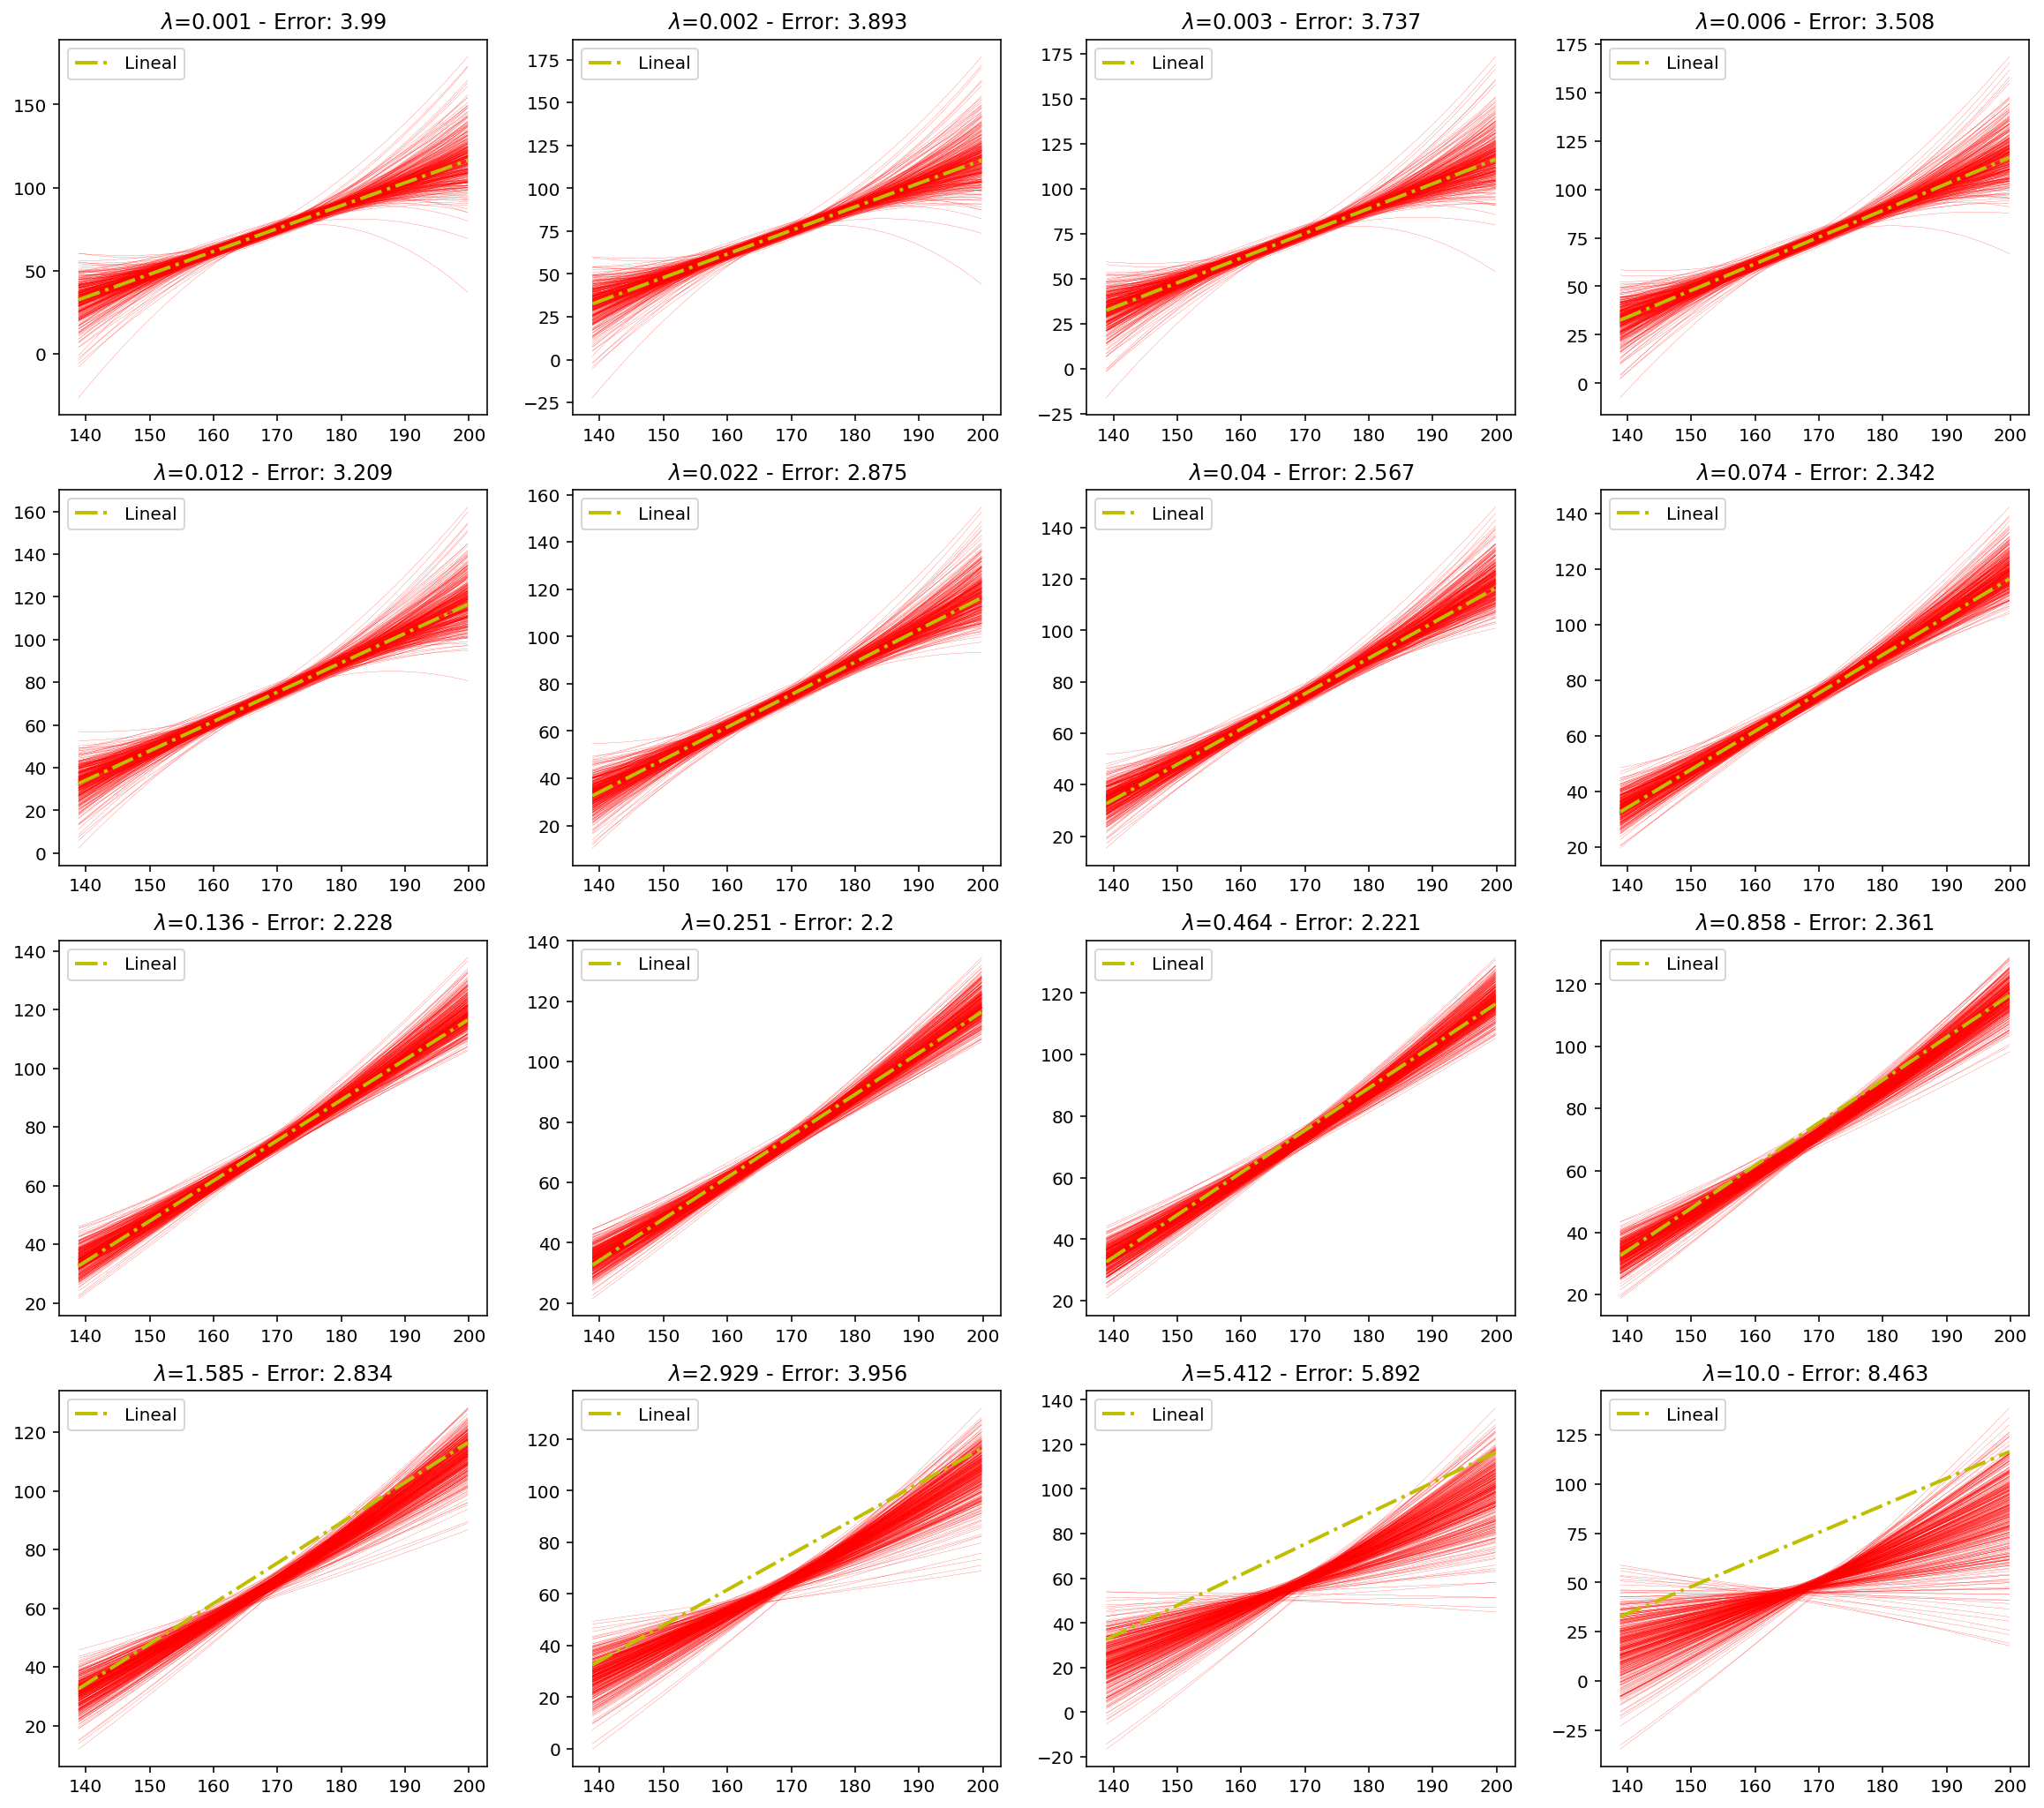

In [19]:
#%matplotlib inline
cols = 4
rows = 4
lambdas = np.logspace(-3, 1, cols*rows)
f, ax = plt.subplots(cols,rows, figsize=(20,18))
ax = ax.reshape(-1)
al = np.linspace(data[:,0].min(),data[:,0].max(), ptos)
errors = []
for i,lamb in enumerate(lambdas):    
    curv_MLE, curv_MAP = get_curves(alturas_pol, data[:,1],data[:,0].min(), data[:,0].max(), mean, std,order = 3, N=20, lamb = lamb)
    error = (curv_MAP.T-pe_LR).std(axis=0).mean()
    errors.append(error)
    ax[i].set_title("$\lambda$=" + str(np.round(lamb*1000)/1000) +" - Error: " + str(str(np.round(error*1000)/1000)))
    ax[i].plot(al, curv_MAP.T, 'r', lw=0.1)
    ax[i].plot(al, pe_LR, 'y', label='Lineal', lw=2, ls='-.')
    ax[i].legend()
plt.show()

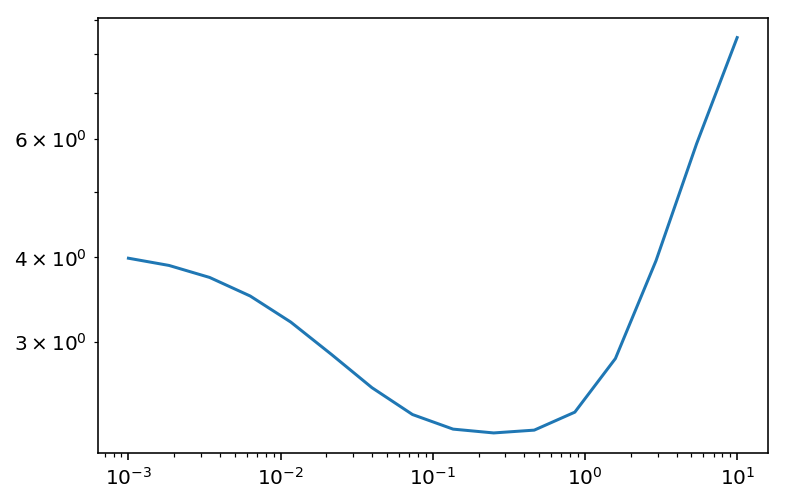

In [20]:
plt.loglog(lambdas, errors)
plt.show()

**Como ver esto en la practica para el caso de la regresión lineal:**

$\large E[(y_0 - x_0^T\hat w)^2|X, x_0] = \sigma^2 + x_0^T(w - E[\hat w])(w - E[\hat w])^Tx_0 + x_0^T \Sigma [\hat w] x_0$

donde:  
- $X$: muestras de training set
- $x_0$: muestra de test set
- $y_0$: salida de test set
- $\hat w$: $w$'s estimadas con $X$
- $w$: ground truth
- $\sigma ^2$: ruido del modelo
- segundo termino: bias elevado al cuadrado. Es cero para least squares. Distinto de cero para Ridge
- tercer termino: Varianza. Suele ser menor para el caso de Ridge

**de que dependen nuestros resultados**
- de los datos
- del lambda